In [1]:
%matplotlib inline

02. Predict with pre-trained Faster RCNN models
==============================================

This article shows how to play with pre-trained Faster RCNN model.

First let's import some necessary libraries:



In [2]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils

Load a pretrained model
-------------------------

Let's get an Faster RCNN model trained on Pascal VOC
dataset with ResNet-50 backbone. By specifying
``pretrained=True``, it will automatically download the model from the model
zoo if necessary. For more pretrained models, please refer to
:doc:`../../model_zoo/index`.

The returned model is a HybridBlock :py:class:`gluoncv.model_zoo.FasterRCNN`
with a default context of `cpu(0)`.



In [3]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

Model file is not found. Downloading.


121888KB [01:32, 1318.66KB/s]                                                  


Pre-process an image
--------------------

Next we download an image, and pre-process with preset data transforms.
The default behavior is to resize the short edge of the image to 600px.
But you can feed an arbitrarily sized image.

You can provide a list of image file names, such as ``[im_fname1, im_fname2,
...]`` to :py:func:`gluoncv.data.transforms.presets.rcnn.load_test` if you
want to load multiple image together.

This function returns two results. The first is a NDArray with shape
`(batch_size, RGB_channels, height, width)`. It can be fed into the
model directly. The second one contains the images in numpy format to
easy to be plotted. Since we only loaded a single image, the first dimension
of `x` is 1.

Please beware that `orig_img` is resized to short edge 600px.



In [6]:
"""
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='biking.jpg')
"""
x, orig_img = data.transforms.presets.rcnn.load_test("image2.jpg",short = 512)

Inference and display
---------------------

The Faster RCNN model returns predicted class IDs, confidence scores,
bounding boxes coordinates. Their shape are (batch_size, num_bboxes, 1),
(batch_size, num_bboxes, 1) and (batch_size, num_bboxes, 4), respectively.

We can use :py:func:`gluoncv.utils.viz.plot_bbox` to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:



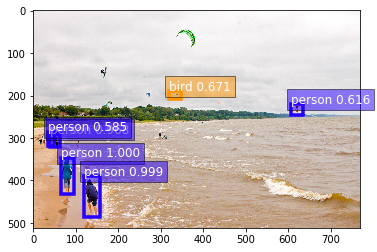

In [7]:
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()